# Calibrating the LHC Run 2 with the Z-boson 
- By: Peggy Chen 
- Date: April 7, 2025 
- Goal: The aim of this project is to determine whether the experimental data from the second run of the Large Hadron Collider at CERN is viable, based on the calculated masses of the Z-boson through two of its decay channels: the double electron and double muon. 

## Double Muon Decay Channel Calculations 

In [30]:
# Import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# Import data in its raw form from Github 
data = pd.read_csv('https://raw.githubusercontent.com/QuarkNet-HEP/coding-camp/refs/heads/main/data/Double_Muon_Run2011A.csv')

# Preview the data - now we know we are talking about data that records momentum and energy values 
data.head() 

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
0,165617,74601703,G,9.69873,-9.510430,0.366205,1.86329,9.51748,0.194546,3.10311,-1,G,9.76332,7.327710,-1.152370,6.34728,7.41776,0.775564,-0.155984,1
1,165617,75100943,G,6.20385,-4.266610,0.456545,-4.47930,4.29097,-0.912070,3.03499,-1,G,9.66898,7.273970,-2.821120,-5.71040,7.80188,-0.678625,-0.369977,1
2,165617,75587682,G,19.28920,-4.212080,-0.651623,18.81210,4.26219,2.190460,-2.98811,-1,G,9.82439,4.343940,-0.473505,8.79849,4.36967,1.449670,-0.108575,1
3,165617,75660978,G,7.04268,-6.326780,-0.268545,3.08025,6.33248,0.469033,-3.09917,-1,G,5.58571,4.474760,0.848935,-3.23185,4.55458,-0.660499,0.187488,1
4,165617,75947690,G,7.27507,0.102966,-5.533080,-4.72122,5.53403,-0.773616,-1.55219,-1,G,7.31811,-0.398831,6.940810,2.28247,6.95226,0.322677,1.628190,1


In [31]:
# Query the data to make cuts in order to remove background noise. 
# Every cut should be justified based on physics or hardware limitations or based on your particle. 
# (I am thinking of 2 cuts, but you may apply more if justified). 

# First cut: identifying the Z bosons by mass 
# Constants and calculations for the mass column 
c = 1 # Speed of light 
# We then can use conservation of momentum to find the original momentum of the parent particle 
# However, we need to calculate the magnitude of p1 + p2 and square it. However, the np.linalg.norm function results in a singular constant 
# Maybe because we are performing the calculation on a column, which is in a 8 x 1 matrix? Either way, I decided to add 
# p1 and p2, and dot this combined vector with itself. This is what I am doing below, since it is equivalent to 
# taking the square of the magnitude of the combined vector, and it will preserve the column structure and assign to variable pmagsquared 
p1 = np.array([data.px1,data.py1,data.pz1]) # Creating momentum vector of first particle 
p2 = np.array([data.px2,data.py2,data.pz2]) # Creating momentum vector of second particle 
p3 = p1 + p2 # Reconstructing momentum vector of parent particle and Zboson candidates 
pmagsquared = p3[0]**2 + p3[1]**2 + p3[2]**2 # The magntiude squared is equal to dotting p3 with itself 
E = data['E1'] + data['E2'] #GeV, Add the energy scalars from each muon together, due to conservation of energy  

# Calculate mass and populate a new column with each valid event's parent mass 
data['Mass'] = np.sqrt((E**2 - pmagsquared * c**2) / c**4) #GeV/c^2, This rearranges energy-momentum relation formula to isolate mass 
data = data.fillna(0) # Fills in a zero for any imaginary values your calculation might produce, since if it's imaginary, it isn't a good candidate for the Zboson 

data_trimmed_1 = data.query('80 < Mass < 100') # Filters mass down to what we are interested in -- around true mass of Z boson of 91.2 GeV/c^2 

/opt/conda/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [32]:
## Second cut: identifying Z bosons by charge 
data_trimmed_2 = data_trimmed_1.query('Q1 + Q2 == 0') # Filters previous dataset (with validated masses) for neutral particles 
data_trimmed_2.head() # Preview result 

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,Mass
21,165617,74969122,G,59.9226,-46.15160,29.4115,-24.4070,54.7266,-0.432382,2.574210,...,G,52.4465,30.10970,-16.39890,-39.68760,34.2859,-0.988511,-0.498717,-1,89.955692
36,165617,75138253,G,97.1011,-23.61440,6.6660,-93.9497,24.5372,-2.052350,2.866470,...,G,30.5992,-11.61340,-25.98480,11.23470,28.4619,0.385137,-1.991090,1,88.608021
46,165617,75887636,G,152.9720,7.46565,-30.7098,-149.6710,31.6042,-2.259260,-1.332320,...,G,33.5835,-9.28778,28.74570,-14.67190,30.2089,-0.468368,1.883310,1,88.245045
78,165617,75833588,G,181.8770,44.14270,-14.9498,175.8040,46.6055,2.037920,-0.326545,...,G,170.0210,-34.63010,12.32480,166.00000,36.7579,2.212820,2.799670,-1,83.095414
110,165617,75779415,G,50.2440,37.80720,-12.2044,-30.7590,39.7283,-0.712422,-0.312246,...,G,49.2396,-47.60640,8.23376,-9.50613,48.3132,-0.195513,2.970330,-1,90.354389


The following code will capture the output in order to suppress the histogram that is not yet finalized [1]. The error bars are added through the plt.errorbar() function [2]. 

In [33]:
%%capture 

# Plot a histogram of these masses 
hist, edges, _ = plt.hist(data_trimmed_2['Mass'], bins = 25, range = [80, 100])
bin_centers = 0.5 * (edges[:-1] + edges[1:]) 

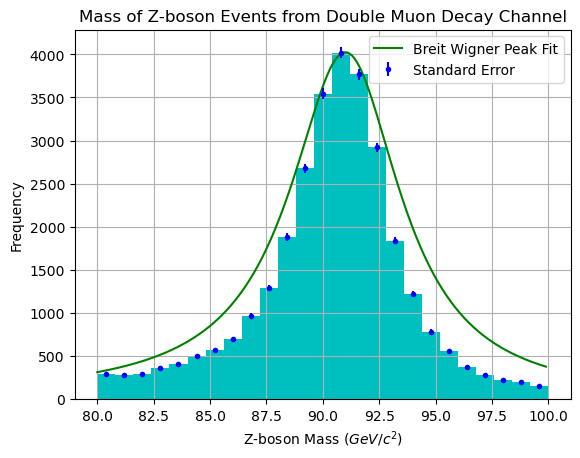

In [34]:
# Plot the theoretical Breit-Wigner curve on your histogram. 
# Make sure your comments include why/how you chose your xmin, xmax, particle mass and width. 

# Set the Breit-Wigner parameters
xmin = 80  # lower bound for your plot
xmax = 100  # upper bound for your plot
particle_mass = 91 # the x-value of the peak
width = 6 # width of the peak halfway up; a.k.a. "full width at half max" or FWHM
K = 1.2e9 # a constant that affects the height of the curve, you'll need to tinker with this some 

# Calculate the Breit-Wigner curve
x = np.arange(xmin, xmax, (xmax-xmin)/200) # makes a series of equally spaced x-values
y = K / ((x**2 - particle_mass**2)**2 + (particle_mass*width)**2) # Calculates the y-values for the B-W curve

# Make the plot
plt.plot(x, y, color = 'g', label = 'Breit Wigner Peak Fit') # Plots the Breit-Wigner distribution curve 
plt.hist(data_trimmed_2['Mass'], bins = 25, range = [80, 100], color = 'c') # Plots the histograms, with 25 bins 
plt.errorbar(bin_centers, hist, yerr = np.sqrt(hist), fmt='b.', label = 'Standard Error') # Adds standard error bars 
plt.title("Mass of Z-boson Events from Double Muon Decay Channel") # Adds title 
# Axes labels 
plt.xlabel("Z-boson Mass ($GeV/c^2$)") 
plt.ylabel("Frequency") 
plt.legend() # Adds legend 
plt.grid(True); # Adds grid 
plt.show() 

## Double Electron Decay Channel Calculations 

In [25]:
# Import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# Import data in its raw form from Github 
data = pd.read_csv('https://raw.githubusercontent.com/QuarkNet-HEP/coding-camp/refs/heads/main/data/Double_Electron_Run2011A.csv')

# Preview the data - now we know we are talking about data that records momentum and energy values 
data.head() 

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1


In [26]:
# Cleaning and filtering data 
# First cut: identifying the Z bosons by mass 
c = 1 # Speed of light 
# We then can use conservation of momentum to find the original momentum of the parent particle 
# However, we need to calculate the magnitude of p1 + p2 and square it. However, the np.linalg.norm function results in a singular constant 
# Maybe because we are performing the calculation on a column, which is in a 8 x 1 matrix? Either way, I decided to add 
# p1 and p2, and dot this combined vector with itself. This is what I am doing below, since it is equivalent to 
# taking the square of the magnitude of the combined vector, and it will preserve the column structure and assign to variable pmagsquared 
p1 = np.array([data.px1,data.py1,data.pz1]) # Creating momentum vector of first particle 
p2 = np.array([data.px2,data.py2,data.pz2]) # Creating momentum vector of second particle 
p3 = p1 + p2 # Reconstructing momentum vector of parent particle and Z boson candidates 
pmagsquared = p3[0]**2 + p3[1]**2 + p3[2]**2 # The magnitude squared is equal to dotting p3 with itself 
E = data['E1'] + data['E2'] #GeV, Add the energy scalars from each muon together, due to conservation of energy  

# Calculate mass and populate a new column with each valid event's parent mass 
data['Mass'] = np.sqrt((E**2 - pmagsquared * c**2) / c**4) #GeV/c^2, This rearranges energy-momentum relation formula to isolate mass 
data = data.fillna(0) # Fills in a zero for any imaginary values your calculation might produce, since if it's imaginary, it isn't a good candidate for the Zboson 

data_trimmed_1 = data.query('80 < Mass < 100') # Trim data to a range of masses likely to be Z boson candidates. 
                                               # Official mass is 91.2 GeV/c^2, so values in this range are plausible for the particle 

/opt/conda/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [27]:
# Second cut: identifying Z bosons by charge 
data_trimmed_2 = data_trimmed_1.query('Q1 + Q2 == 0') # Filters previous dataset (with validated masses) for neutral particles 
data_trimmed_2.head() # Preview result 

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,Mass
20,147115,369036793,28.2165,22.39330,-4.73948,16.499800,22.8894,0.669664,-0.208569,1,97.1467,-18.0195,9.98944,-94.93680,20.6032,-2.232480,2.635400,-1,97.554481
26,147115,368934550,39.6056,-31.37060,-24.16940,0.568363,39.6015,0.014352,-2.485130,1,70.1602,49.2964,-7.87303,-49.29850,49.9211,-0.872527,-0.158371,-1,91.246112
33,147115,369449951,33.4986,9.75679,14.44640,-28.605300,17.4326,-1.270470,0.976787,-1,56.7482,-12.6667,-18.81680,52.01770,22.6830,1.567580,-2.163280,1,86.998715
49,147115,481522582,33.5242,20.34240,3.35346,26.435100,20.6169,1.067550,0.163381,1,59.6179,-22.4068,-8.28623,-54.62210,23.8899,-1.564840,-2.787380,-1,88.613486
124,147115,260678156,42.2118,-7.73762,22.22740,-35.041600,23.5356,-1.188570,1.905790,-1,71.6051,-60.1426,-38.07320,7.78333,71.1808,0.109129,-2.577230,1,85.746486


The following code once again will capture the output in order to suppress the histogram that is not yet finalized [1]. The error bars are added through the plt.errorbar() function [2].  

In [28]:
%%capture 

# Plot a histogram of these masses 
hist, edges, _ = plt.hist(data_trimmed_2['Mass'], bins = 25, range = [80, 100]) # Note the bin size, calling trimmed data, and the range of masses for our interests 
bin_centers = 0.5 * (edges[:-1] + edges[1:]) # Adds labels to the center of the bin (as opposed to the edge) 

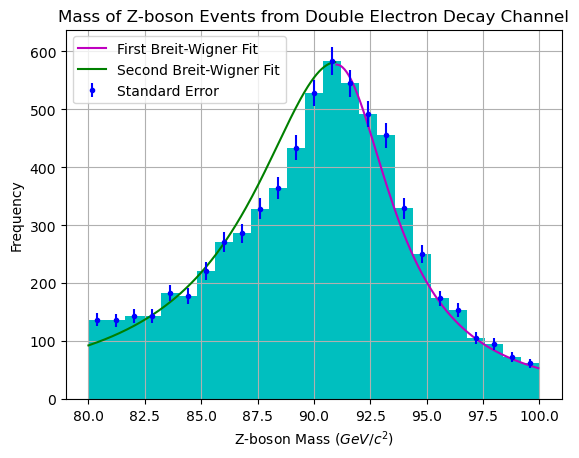

In [29]:
# Plot the theoretical Breit-Wigner curve on your histogram. 
# Make sure your comments include why/how you chose your xmin, xmax, particle mass and width. 

# Set the Breit-Wigner parameters for the first curve (right half of histogram) 
xmin = 91  # Lower bound for your plot
xmax = 100  # Upper bound for your plot
particle_mass = 91 #GeV/c^2, The x-value of the peak
width = 6 # Width of the peak halfway up; a.k.a. "full width at half max" or FWHM, approximated with right half 
K = 1.72e8 # A constant that affects the height of the curve, you'll need to tinker with this some 

# Calculate the Breit-Wigner curve itself 
x = np.arange(xmin, xmax, (xmax-xmin)/200) # makes a series of equally spaced x-values
y = K / ((x**2 - particle_mass**2)**2 + (particle_mass*width)**2) # calculates the y-values for the B-W curve

# Repeat operation for the left half and a second curve 
xmin1 = 80 # Lower bound for your plot
xmax1 = 91 # Upper bound for your plot
K1 = 3.9e8 # A constant that affects the height of the curve, you'll need to tinker with this some 
x1 = np.arange(xmin1, xmax1, (xmax1-xmin1)/200) # Makes a series of equally spaced x-values
width1 = 9 # Width of the peak halfway up, approximated with left half 
y1 = K1 / ((x1**2 - particle_mass**2)**2 + (particle_mass*width1)**2) # calculates the y-values for the B-W curve

# Define function 

# Make the plot
plt.plot(x, y, color = 'm', label = 'First Breit-Wigner Fit') # Plots first Breit-Wigner curve of best fit 
plt.plot(x1, y1, color = 'g', label = 'Second Breit-Wigner Fit') # Plots second curve in piecewise function 
plt.hist(data_trimmed_2['Mass'], bins = 25, range = [80, 100], color = 'c') # Plots histogram with 25 bins 
plt.errorbar(bin_centers, hist, yerr = np.sqrt(hist), fmt='b.', label = 'Standard Error') # Adds standard error, according to cited method 
plt.title("Mass of Z-boson Events from Double Electron Decay Channel") # Adds title 
# Axes labels 
plt.xlabel("Z-boson Mass ($GeV/c^2$)") 
plt.ylabel("Frequency") 
plt.legend(loc = 'upper left') # Adds legend 
plt.grid(True); # Adds grid 
plt.show() 

## References 
[1] T. Kluyver. "Jupyter Notebook: command for hide the output of a cell?" Stack Overflow, May 2016. Accessed: April 10, 2025. [Online]. Available: [https://stackoverflow.com/questions/37154329/jupyter-notebook-command-for-hide-the-output-of-a-cell](https://stackoverflow.com/questions/37154329/jupyter-notebook-command-for-hide-the-output-of-a-cell). 

[2] Anonymous. "How to add error bars to histogram diagram in python." Stack Overflow, February 2016. Accessed: April 10, 2025. [Online]. Available: [https://stackoverflow.com/questions/35390276/how-to-add-error-bars-to-histogram-diagram-in-python](https://stackoverflow.com/questions/35390276/how-to-add-error-bars-to-histogram-diagram-in-python). 